# Sequential forward selection

`Sequential forward selection` is a wrapper method that __builds a feature set by starting with no features and then adding one feature at a time__ until a desired number of features is reached. In the first step, the algorithm will train and test a model using only one feature at a time. The algorithm __keeps the feature that performs best__.

In each subsequent step, the algorithm will test the model on each possible new feature addition. Whichever feature improves model performance the most is then added to the feature subset. This process stops once we have the desired number of features.

Let’s say we want to use three features, and we have five features to choose from: age, height, weight, blood_pressure, and resting_heart_rate. Sequential forward selection __will train your machine learning model on five different feature subsets__: one for __each feature__.

If the model performs best on the subset {age}, the algorithm will then train and test the model on the following four subsets:

{age, height}
{age, weight}
{age, blood_pressure}
{age, resting_heart_rate}
If the model performs best on {age, resting_heart_rate}, the algorithm will test the model on the following three subsets:

{age, height, resting_heart_rate}
{age, weight, resting_heart_rate}
{age, blood_pressure, resting_heart_rate}
If the model performs best on {age, weight, resting_heart_rate}, it will stop the algorithm and use that feature set.

Sequential forward selection is a __greedy algorithm__: instead of checking every possible feature set by brute force, it adds whichever feature gives the best immediate performance gain.

We will use the SFS class from Python’s mlxtend library to implement sequential forward selection and choose a subset of just THREE features for the logistic regression model.

# Set up SFS parameters
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0)
# Fit SFS to our features X and outcome y   
sfs.fit(X, y)

- The first parameter is the name of the model that you’re using. 
In the previous exercise, we called the logistic regression model lr.
- The parameter `k_features` determines `how many features` the algorithm will select.
- `forward=True` and `floating=False` ensure that we are __using sequential forward selection__.
- `scoring` _determines how the algorithm will evaluate each feature subset_. It’s often okay to use the default value None because mlxtend will automatically use a metric that is suitable for whatever `scikit-learn` model you are using. For this, we’ll set it to 'accuracy'.
- `cv` allows you to do `k-fold cross-validation`. We’ll leave it at 0 for this lesson and only evaluate performance on the training set.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0)
# Fit the equential forward selection model
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

## Evaluating the Result of Sequential Forward Selection

The sfs object that you fit in the previous exercise contains information about the sequential forward selection that was applied to your feature set. The .subsets_ attribute allows you to see much of that information, including which feature was chosen at each step and the model’s accuracy after each feature addition.

sfs.subsets_ is a dictionary that looks something like this:

In [2]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': np.float64(0.7241379310344828),
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': np.float64(0.7327586206896551),
  'feature_names': ('Age', 'Glucose')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': np.float64(0.7672413793103449),
  'feature_names': ('Age', 'Glucose', 'Insulin')}}

'avg_score' is the accuracy of the model with the specified number of features.
In this particular example, the model had an accuracy of about 72.4% after the feature `Glucose` was added. The accuracy improved to about 73.2% after a second feature, `Insulin`, was added. Once three features were added the accuracy improved to about 76.7%.

In [3]:
print(sfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')


In [5]:
print(sfs.subsets_[3]['avg_score'])

0.7672413793103449


The `mlxtend` library also makes it __easy to visualize how the accuracy of a model changes__ as sequential forward selection adds features. You can use the code `plot_sfs(sfs.get_metric_dict())` to create a matplotlib figure that plots the model’s performance as a function of the number of features used.

/Users/zero/Documents/algorithm/Python_Intermediate/venv/lib/python3.10/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:895: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


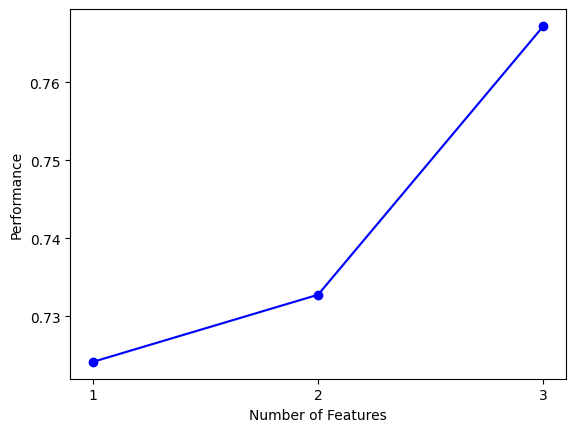

In [6]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()